In [30]:
# database and calcs
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression
from sklearn import linear_model
import statsmodels.api as sm


# Analysis of Houses on Same Street

In [14]:
data = pd.read_csv('/Users/DanCassin/Development/scrapy_projects/operation_fairfax/fairfax.csv')

data['current_assessment'] = data['current_building'] + data['current_land']
data['total_taxes'] = data['general_fund_taxes'] + data['special_tax_dist']

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             71 non-null     object 
 1   sale_date           71 non-null     object 
 2   sale_amount         71 non-null     int64  
 3   current_building    71 non-null     int64  
 4   current_land        71 non-null     int64  
 5   general_fund_taxes  71 non-null     float64
 6   special_tax_dist    71 non-null     float64
 7   current_assessment  71 non-null     int64  
 8   total_taxes         71 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 5.1+ KB


,address,sale_date,sale_amount,current_building,current_land,general_fund_taxes,special_tax_dist,current_assessment,total_taxes
0,5200 KINGS PARK DR SPRINGFIELD VA 22151,03/19/2018,430000,337580,239000,6630.67,193.16,576580,6823.83
1,5205 KINGS PARK DR SPRINGFIELD VA 22151,11/01/2019,565000,295780,237000,6126.97,178.48,532780,6305.45
2,5207 KINGS PARK DR SPRINGFIELD VA 22151,11/19/2008,340000,259190,236000,5694.69,165.89,495190,5860.58
3,5206 KINGS PARK DR SPRINGFIELD VA 22151,11/21/2003,291000,281090,237000,5958.04,173.56,518090,6131.60
4,5204 KINGS PARK DR SPRINGFIELD VA 22151,02/17/1987,128500,266720,237000,5792.78,168.75,503720,5961.53


In [25]:
data = data[data['total_taxes'] > 0]

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 70
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             70 non-null     object 
 1   sale_date           70 non-null     object 
 2   sale_amount         70 non-null     int64  
 3   current_building    70 non-null     int64  
 4   current_land        70 non-null     int64  
 5   general_fund_taxes  70 non-null     float64
 6   special_tax_dist    70 non-null     float64
 7   current_assessment  70 non-null     int64  
 8   total_taxes         70 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 5.5+ KB


In [29]:
y = data['total_taxes']

X = data[['current_building', 'current_land']]

########

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

print(results.summary())

OLS Regression Results                            
Dep. Variable:            total_taxes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.034e+11
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.27e-318
Time:                        16:10:12   Log-Likelihood:                 273.99
No. Observations:                  70   AIC:                            -542.0
Df Residuals:                      67   BIC:                            -535.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0797      0.140      0.569      0.571      -0

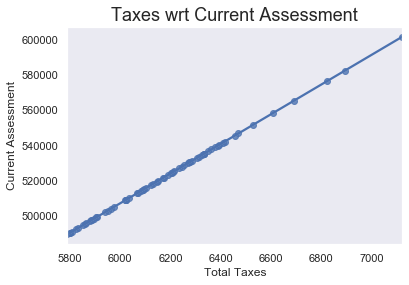

In [40]:
sns.set(style='dark')
sns.regplot(x='total_taxes', y='current_assessment', data=data)
plt.title('Taxes wrt Current Assessment', fontsize=18)
plt.xlabel('Total Taxes')
plt.ylabel('Current Assessment');

In [32]:
sale_amounts = data[data['sale_amount']>0]

sale_amounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 70
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             51 non-null     object 
 1   sale_date           51 non-null     object 
 2   sale_amount         51 non-null     int64  
 3   current_building    51 non-null     int64  
 4   current_land        51 non-null     int64  
 5   general_fund_taxes  51 non-null     float64
 6   special_tax_dist    51 non-null     float64
 7   current_assessment  51 non-null     int64  
 8   total_taxes         51 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 4.0+ KB


In [33]:
y = sale_amounts['total_taxes']

X = sale_amounts['sale_amount']

########

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

print(results.summary())

OLS Regression Results                            
Dep. Variable:            total_taxes   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3.530
Date:                Fri, 24 Jul 2020   Prob (F-statistic):             0.0662
Time:                        16:21:00   Log-Likelihood:                -358.32
No. Observations:                  51   AIC:                             720.6
Df Residuals:                      49   BIC:                             724.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6030.7750     79.333     76.018      0.000    5871.349    6190.20

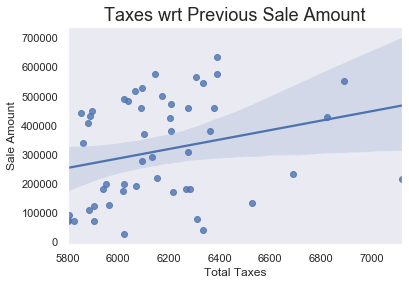

In [41]:
sns.regplot(x='total_taxes', y='sale_amount', data=sale_amounts)
plt.title('Taxes wrt Previous Sale Amount', fontsize=18)
plt.xlabel('Total Taxes')
plt.ylabel('Sale Amount');

## Analysis of Comp Set

In [92]:
comps = pd.read_csv('/Users/DanCassin/Development/scrapy_projects/operation_fairfax/fairfax_comps.csv')

comps.info()
comps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               65 non-null     object 
 1   sale_date             65 non-null     object 
 2   sale_amount           65 non-null     int64  
 3   current_building      65 non-null     int64  
 4   current_land          65 non-null     int64  
 5   general_fund_taxes    65 non-null     float64
 6   special_tax_dist      65 non-null     float64
 7   bedrooms              65 non-null     int64  
 8   full_baths            65 non-null     int64  
 9   half_baths            65 non-null     int64  
 10  liv_area_sqft         65 non-null     int64  
 11  total_basement_area   65 non-null     int64  
 12  lot_sqft              65 non-null     int64  
 13  style                 65 non-null     object 
 14  condition_grade       65 non-null     object 
 15  construction_quality  65 

,address,sale_date,sale_amount,current_building,current_land,general_fund_taxes,special_tax_dist,bedrooms,full_baths,half_baths,liv_area_sqft,total_basement_area,lot_sqft,style,condition_grade,construction_quality
0,8805 CROMWELL DR SPRINGFIELD VA 22151,04/24/2019,539000,301830,235000,6173.55,179.84,4,2,0,1500,1000,10742,1 1/2 Story,GD-Good,A-AVERAGE
1,8808 CROMWELL DR SPRINGFIELD VA 22151,07/22/2019,549900,287190,237000,6028.19,175.60,3,2,1,1800,0,13125,2 Story,AV-Average,A-AVERAGE
2,8813 VICTORIA RD SPRINGFIELD VA 22151,10/09/2018,542000,310190,235000,6269.69,182.64,4,2,1,1800,0,10500,2 Story,GD-Good,A-AVERAGE
3,8900 CROMWELL DR SPRINGFIELD VA 22151,04/26/2019,577100,318410,236000,6375.72,185.72,4,2,1,1590,750,12186,2 Story,GD-Good,A-AVERAGE
4,8903 CROMWELL DR SPRINGFIELD VA 22151,12/14/2018,535000,271140,238000,5855.11,170.56,4,3,0,1340,868,15246,1 Story,AV-Average,A-AVERAGE


In [94]:
print(comps['style'].unique())
print(comps.condition_grade.unique())
print(comps.construction_quality.unique())

['1 1/2 Story' '2 Story' '1 Story' 'Split Foyer']
['GD-Good' 'AV-Average' 'VG-Average Plus']
['A-AVERAGE' 'G10-GOOD 10']


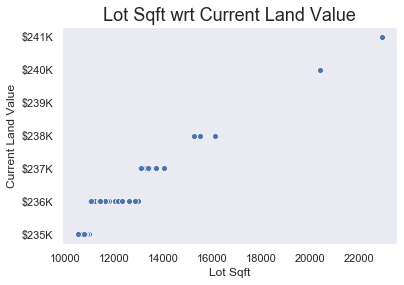

In [109]:
from matplotlib.ticker import FuncFormatter

def currency(x, pos):
    return '${:1.0f}K'.format(x*1e-3)

formatter=FuncFormatter(currency)

fig, ax = plt.subplots()
sns.scatterplot(x='lot_sqft', y='current_land', data=comps, ax=ax)
ax.set_title('Lot Sqft wrt Current Land Value', fontsize=18)
ax.set_xlabel('Lot Sqft')
ax.set_ylabel('Current Land Value')
ax.yaxis.set_major_formatter(formatter);

In [113]:
y = comps['current_building']

X = comps[['full_baths', 'half_baths', 'liv_area_sqft']]

########

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

print(results.summary())

OLS Regression Results                            
Dep. Variable:       current_building   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     8.333
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           9.96e-05
Time:                        11:19:38   Log-Likelihood:                -740.10
No. Observations:                  65   AIC:                             1488.
Df Residuals:                      61   BIC:                             1497.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.34e+05   1.33e+04     17.534      0.000    2.07e+05    2